# Аналитика в авиакомпании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение графиков</a></span><ul class="toc-item"><li><span><a href="#Модели-самолетов-и-количество-рейсов" data-toc-modified-id="Модели-самолетов-и-количество-рейсов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модели самолетов и количество рейсов</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание данных

База данных об авиаперевозках:

Таблица **`airports`** — информация об аэропортах:

- `airport_code` — трёхбуквенный код аэропорта,
- `airport_name` — название аэропорта,
- `city` — город,
- `timezone` — часовой пояс.

Таблица **`aircrafts`** — информация о самолётах:

- `aircraft_code` — код модели самолёта,
- `model` — модель самолёта,
- `range` — дальность полётов.

Таблица **`tickets`** — информация о билетах:

- `ticket_no` — уникальный номер билета,
- `passenger_id` — уникальный идентификатор пассажира,
- `passenger_name` — имя и фамилия пассажира.

Таблица **`flights`** — информация о рейсах:

- `flight_id` — уникальный идентификатор рейса,
- `departure_airport` — аэропорт вылета,
- `departure_time` — дата и время вылета,
- `arrival_airport` — аэропорт прилёта,
- `arrival_time` — дата и время прилёта,
- `aircraft_code` — уникальный идентификатор самолёта.

Таблица **`ticket_flights`** — стыковая таблица «рейсы-билеты»:

- `ticket_no` — номер билета,
- `flight_id` — уникальный идентификатор рейса.

Таблица **`festivals`** — информация о фестивалях:

- `festival_id` — уникальный номер фестиваля,
- `festival_date` — дата проведения фестиваля,
- `festival_city` — город проведения фестиваля,
- `festival_name` — название фестиваля.

Файлы, в которых содержатся результаты запросов из предыдущих этапов проекта:

**/datasets/query_1.csv** — результат первого запроса. В нём содержится информация о:
- *model* — модели самолета
- *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**/datasets/query_3.csv** — результат третьего запроса. В нём содержится информация о:
- *city* — городах
- *average_flights* — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Что нужно сделать:
- импортировать файлы и изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
q1 = pd.read_csv('/datasets/query_1.csv')
q3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
q1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


C данным из первого запроса все в порядке. Посмотрим на другой:

In [5]:
q3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Все в порядке, кроме типа данных `average_flights`. Изменим его на *int*:

In [7]:
q3['average_flights'] = q3['average_flights'].astype('int')

In [8]:
q3.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


In [9]:
q3.duplicated().sum()

0

**Вывод:** С данными в обеих таблицах все хорошо, дубликатов нет, типы данных в порядке, пропусков нет.

## Построение графиков

### Модели самолетов и количество рейсов

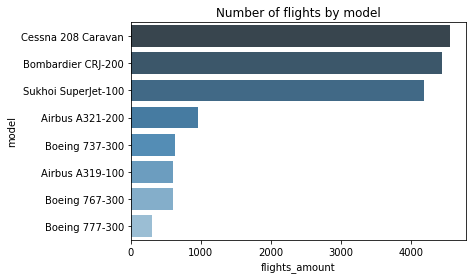

In [10]:
q1_sorted = q1.sort_values('flights_amount', ascending=False)
ax = sns.barplot(x='flights_amount', y='model', data=q1_sorted, palette='Blues_d')
plt.title('Number of flights by model')
plt.show()

**Вывод:** По количеству рейсов лидирует самолет легкой авиации для полетов на небольшие расстояния — Cessna 208 Caravan. Дальше идут два самолета покрупнее, ближнемагистральные Bombardier CRJ-200 и Sukhoi Superjet-100. Общая картина показывает, что чем крупнее самолет, тем меньше рейсов он совершает.

### Города и количество рейсов

Выберем топ-10 городов по количеству рейсов:

In [11]:
top10 = q3.sort_values('average_flights', ascending=False).head(10)
top10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


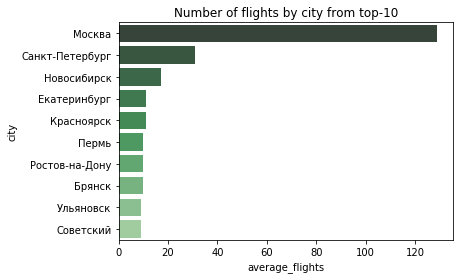

In [12]:
ax = sns.barplot(x='average_flights', y='city', data=top10, palette='Greens_d')
plt.title('Number of flights by city from top-10')
plt.show()

**Вывод:** Самые крупные города, аэропорты в которых являются крупными транспортыми хабами, находятся на верхних позициях. Москва — безусловный лидер.

In [13]:
top30 = q3.nlargest(30, columns=['average_flights'])
others = pd.DataFrame(dict(city=['Остальные'],average_flights=[q3[~q3['city']
              .isin(top30['city'])]['average_flights']
              .sum()]))

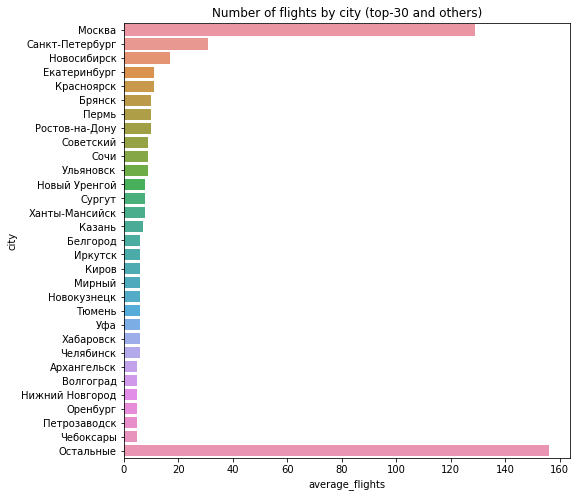

In [14]:
sns.set_color_codes('pastel')
plt.figure(figsize=(8, 8))
sns.barplot(y='city',x='average_flights', data=pd.concat([top30, others]))
sns.set_color_codes('muted')
plt.title('Number of flights by city (top-30 and others)')
plt.show()

**Вывод:** Москва — настолько большой хаб, что во всех остальных 70 городах, не входящих в топ-30, в сумме среднее количество рейсов совсем немного больше, чем в одной-единственной Москве.

## Общий вывод

Изучив данные по количеству перелетов за сентябрь 2018 г. для каждой модели самолета и построив график, выяснили, что по количеству рейсов лидируют легкий самолет Cessna 208 Caravan и два ближнемагистральных — Bombardier CRJ-200 и Sukhoi Superjet-100. Чем крупнее самолет, тем меньше рейсов он совершает.

Также выяснили, что среди городов с самым большим количеством рейсов, Москва — безусловный лидер, далее идут другие крупные города-хабы.